#Dataset for predictiong the percent of admission chance in University based on differenct Exam scores

In [107]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files

In [108]:
from google.colab import drive #to import the google drive data

In [109]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
cd /content/drive/"My Drive/Colab Notebooks/Individual_dataset_MVLR" 

/content/drive/My Drive/Colab Notebooks/Individual_dataset_MVLR


In [111]:
dataset = pd.read_csv("Admission_Predict.csv")
print(dataset)

     Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit 
0             1        337          118  ...  9.65         1              0.92
1             2        324          107  ...  8.87         1              0.76
2             3        316          104  ...  8.00         1              0.72
3             4        322          110  ...  8.67         1              0.80
4             5        314          103  ...  8.21         0              0.65
..          ...        ...          ...  ...   ...       ...               ...
395         396        324          110  ...  9.04         1              0.82
396         397        325          107  ...  9.11         1              0.84
397         398        330          116  ...  9.45         1              0.91
398         399        312          103  ...  8.78         0              0.67
399         400        333          117  ...  9.66         1              0.95

[400 rows x 9 columns]


In [112]:
dataset.shape

(400, 9)

In [113]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [114]:
dataset.dropna()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [115]:
#feature Normalization
def feature_normalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std

    return X_norm,mean,std

In [116]:
#taking each feature individually from the dataset.
Gre_score = dataset.iloc[0:dataset.shape[0],1:2]
TOEFL_score = dataset.iloc[0:dataset.shape[0],2:3]
University_rating = dataset.iloc[0:dataset.shape[0],3:4]
Sop_score = dataset.iloc[0:dataset.shape[0],4:5]
Lor_score = dataset.iloc[0:dataset.shape[0],5:6]
CGPA_score = dataset.iloc[0:dataset.shape[0],6:7]
Reasearch = dataset.iloc[0:dataset.shape[0],7:8]
Chance_of_Admit = dataset.iloc[0:dataset.shape[0],8:9]

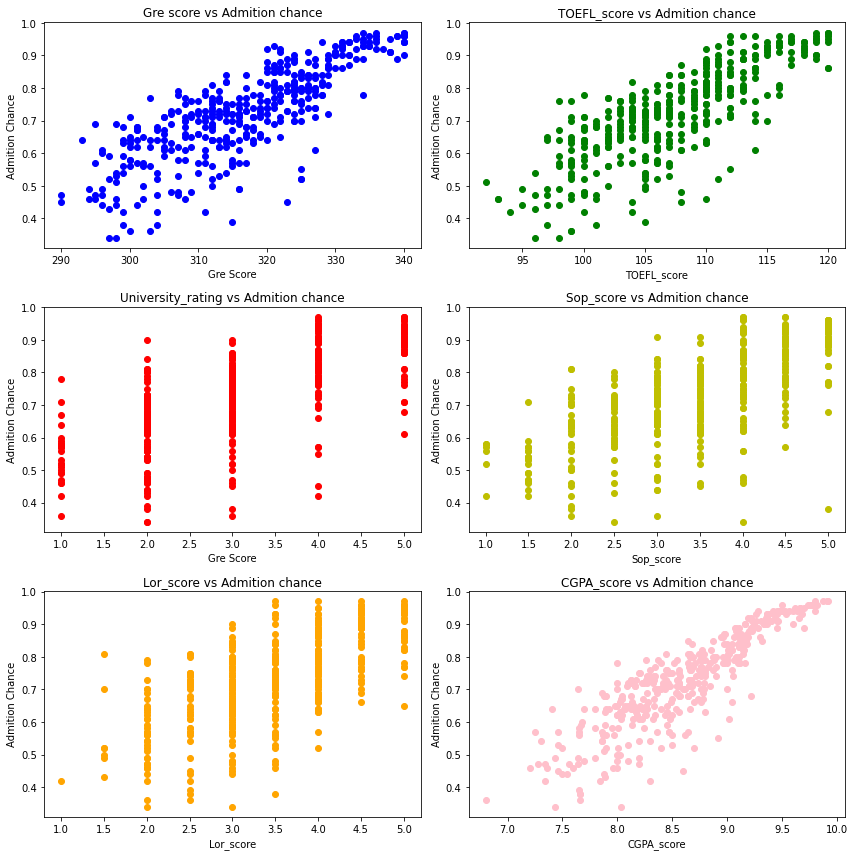

In [117]:
#plotting the prediction chance_of_admit with each data point or feature.
fig,axes = plt.subplots(figsize=(12,12),nrows=3,ncols=2)

axes[0][0].scatter(Gre_score,Chance_of_Admit,color='b')
axes[0][0].set_xlabel("Gre Score")
axes[0][0].set_ylabel("Admition Chance")
axes[0][0].set_title("Gre score vs Admition chance")

axes[0][1].scatter(TOEFL_score,Chance_of_Admit,color='g')
axes[0][1].set_xlabel("TOEFL_score")
axes[0][1].set_ylabel("Admition Chance")
axes[0][1].set_title("TOEFL_score vs Admition chance")

axes[1][0].scatter(University_rating,Chance_of_Admit,color='r')
axes[1][0].set_xlabel("Gre Score")
axes[1][0].set_ylabel("Admition Chance")
axes[1][0].set_title("University_rating vs Admition chance")

axes[1][1].scatter(Sop_score,Chance_of_Admit,color='y')
axes[1][1].set_xlabel("Sop_score")
axes[1][1].set_ylabel("Admition Chance")
axes[1][1].set_title("Sop_score vs Admition chance")

axes[2][0].scatter(Lor_score,Chance_of_Admit,color='orange')
axes[2][0].set_xlabel("Lor_score")
axes[2][0].set_ylabel("Admition Chance")
axes[2][0].set_title("Lor_score vs Admition chance")

axes[2][1].scatter(CGPA_score,Chance_of_Admit,color='pink')
axes[2][1].set_xlabel("CGPA_score")
axes[2][1].set_ylabel("Admition Chance")
axes[2][1].set_title("CGPA_score vs Admition chance")

plt.tight_layout()

In [118]:
type(dataset)

pandas.core.frame.DataFrame

In [119]:
data = dataset.values       #dataFrames to array
n = len(data[:,-1])
X=data[:,1:8].reshape(n,7)
X_norm,mean,std = feature_normalization(X)

In [120]:
mean

array([316.8075  , 107.41    ,   3.0875  ,   3.4     ,   3.4525  ,
         8.598925,   0.5475  ])

In [121]:
print(X_norm.shape[0])

400


In [123]:
Y=data[:,-1].reshape(n,1)   

In [ ]:
Y

In [125]:
theta_array = np.zeros((8,1))

In [126]:
#defining the Hypothesis    : H(x) = theta0 + theta1*x1 + theta2*x2+...

def hypothesis(theta_array,x1,x2,x3,x4,x5,x6,x7):      
    return theta_array[0]+(theta_array[1]*x1)+(theta_array[2]*x2)+(theta_array[3]*x3)+(theta_array[4]*x4)+(theta_array[5]*x5)+(theta_array[6]*x6)+(theta_array[7]*x7)

In [127]:
def cost_function(theta_array,x1,x2,x3,x4,x5,x6,x7,y,m):   #x and y are list of observation.
    total_error = 0     #accumulate all the error
    for i in range(m):
        total_error+=(theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i] - y[i])**2

    return total_error/(2*m)

In [128]:
def gradient_descent(theta_array,x1,x2,x3,x4,x5,x6,x7,y,alpha,m):
    summation_theta0 = 0
    summation_theta1 = 0
    summation_theta2 = 0
    summation_theta3 = 0
    summation_theta4 = 0
    summation_theta5 = 0
    summation_theta6 = 0
    summation_theta7 = 0

    for i in range(m):
        summation_theta0+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x1[i])
        summation_theta2+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x2[i])
        summation_theta3+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x3[i])
        summation_theta4+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x4[i])
        summation_theta5+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x5[i])
        summation_theta6+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x6[i])
        summation_theta7+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]+theta_array[3]*x3[i]+
                      theta_array[4]*x4[i]+theta_array[5]*x5[i]+theta_array[6]*x6[i]+theta_array[7]*x7[i]) - y[i])*x7[i])

    new_theta0 = theta_array[0]-alpha*(summation_theta0/m)
    new_theta1 = theta_array[1]-alpha*(summation_theta1/m)
    new_theta2 = theta_array[2]-alpha*(summation_theta2/m)
    new_theta3 = theta_array[3]-alpha*(summation_theta3/m)
    new_theta4 = theta_array[4]-alpha*(summation_theta4/m)
    new_theta5 = theta_array[5]-alpha*(summation_theta5/m)
    new_theta6 = theta_array[6]-alpha*(summation_theta6/m)
    new_theta7 = theta_array[7]-alpha*(summation_theta7/m)

    updated_theta_array = [new_theta0,new_theta1,new_theta2,new_theta3,new_theta4,new_theta5,new_theta6,new_theta7]
    #print(updated_theta_array)
    return updated_theta_array

In [130]:
def training(x1,x2,x3,x4,x5,x6,x7,y,alpha,iters):
    theta_0 = 0
    theta_1 = 0
    theta_2 = 0
    theta_3 = 0
    theta_4 = 0
    theta_5 = 0
    theta_6 = 0
    theta_7 = 0
    theta_array = [theta_0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7]

    m=x1.size                #size of the data set or the number of observation
    cost_function_values = []
    for i in range(iters):
        theta_array = gradient_descent(theta_array,x1,x2,x3,x4,x5,x6,x7,y,alpha,m)     #taking the new theta's
        cost_function_values.append(cost_function(theta_array,x1,x2,x3,x4,x5,x6,x7,y,m))   #taking all the cost function values and storing
        '''
        if(i%6==0):
            y_new=x7*theta_array[7]+x6*theta_array[6]+x5*theta_array[5]+x4*theta_array[4]+x3*theta_array[3]+x2*theta_array[2]+x1*theta_array[1]+theta_array[0]       #linear regression line
            plt.plot(x1,y_new,'r')
            plt.scatter(x1,y)
            plt.show()
        '''
    x=np.arange(0,len(cost_function_values),step=1)
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("number of iteration")
    plt.ylabel("Cost/loss values")
    plt.title("cost Function curve")
    plt.show()

    return theta_array

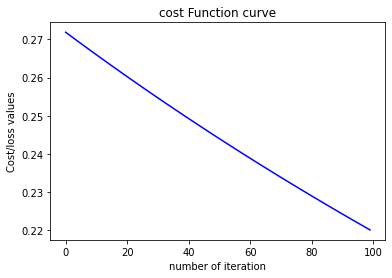

In [131]:
alpha = 0.001
iters = 100
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

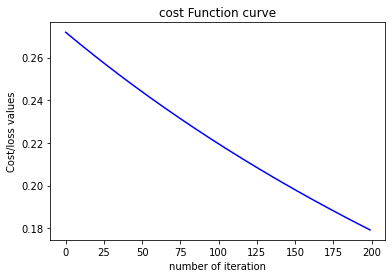

In [53]:
alpha = 0.001
iters = 200
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

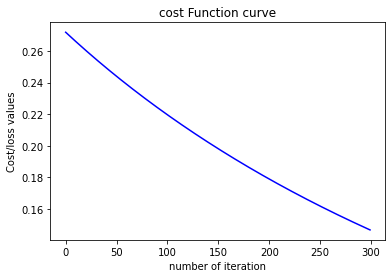

In [54]:
alpha = 0.001
iters = 300
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

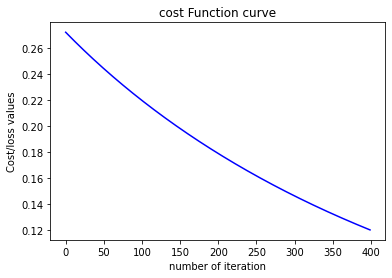

In [55]:
alpha = 0.001
iters = 400
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

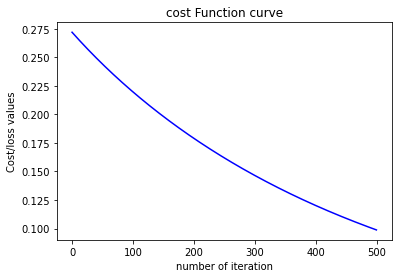

In [56]:
alpha = 0.001
iters = 500
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

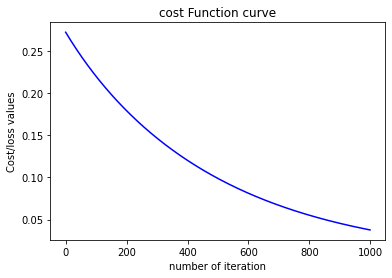

In [57]:
alpha = 0.001
iters = 1000
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

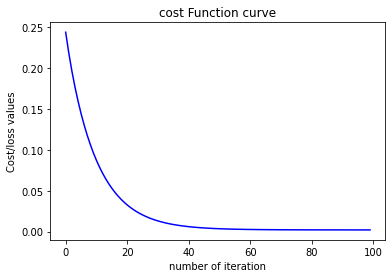

In [58]:
alpha = 0.05
iters = 100
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

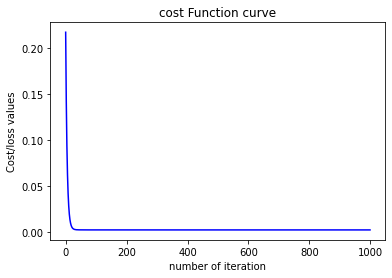

In [59]:
alpha = 0.1
iters = 1000
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

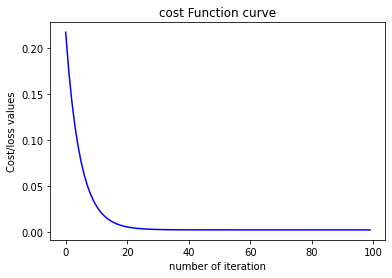

In [139]:
alpha = 0.1
iters = 100
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

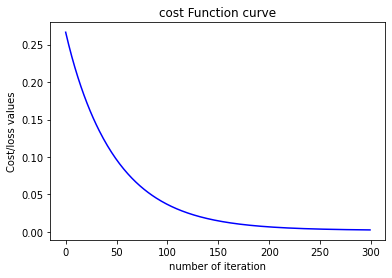

In [61]:
alpha = 0.01
iters = 300
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],X_norm[:,2:3],X_norm[:,3:4],X_norm[:,4:5],X_norm[:,5:6],X_norm[:,6:7],Y,alpha,iters)

In [ ]:
theta_array

#Normal Equation method for the individual dataset

In [ ]:
column_to_be_added = np.array([np.ones(len(X_norm))])
X = np.hstack((np.atleast_2d(column_to_be_added).T, X_norm ))

In [140]:
theta_array_norm = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)         #Normal Equation Formula and calculate the theta array
print(theta_array_norm)
print(theta_array)

[[ 0.72435   ]
 [ 0.01990951]
 [ 0.01769825]
 [ 0.00653012]
 [-0.00332371]
 [ 0.02005866]
 [ 0.07083692]
 [ 0.01220709]]
[array([0.72433076]), array([0.02395506]), array([0.02020956]), array([0.00750254]), array([-0.00162662]), array([0.02057688]), array([0.06191103]), array([0.01187439])]
